In [42]:
import six
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from stompy.model.fish_ptm import ptm_config, ptm_tools
six.moves.reload_module(ptm_config)
%matplotlib notebook

In [53]:
cfg=ptm_config.PtmConfig.load('ebmud_test')

In [54]:
recs=[]

for bf in cfg.bin_files():
    ptmbin=ptm_tools.PtmBin(bf)
    tn=ptmbin.count_timesteps()
    timestamp,data=ptmbin.read_timestep(tn-1)
    recs.append(dict(filename=os.path.basename(bf),
                     nsteps=tn,
                     nparticles=len(data)))
    #print("{filename}: {nsteps} output steps, {nparticles} particles"
    #          .format(filename=os.path.basename(bf),
    #                  nsteps=tn,
    #                  nparticles=len(data)))
    

In [55]:
df=pd.DataFrame(recs)
df

,filename,nparticles,nsteps
0,src001_down20000_bin.out,9600,959
1,src001_up20000_bin.out,9548,959


In [27]:
df.nparticles.sum()


148938

In [45]:
ptmbin=ptm_tools.PtmBin(cfg.bin_files()[2])

In [46]:
ptmbin.count_timesteps()

340

In [47]:
timestamp,data=ptmbin.read_timestep(339)

<IPython.core.display.Javascript object>


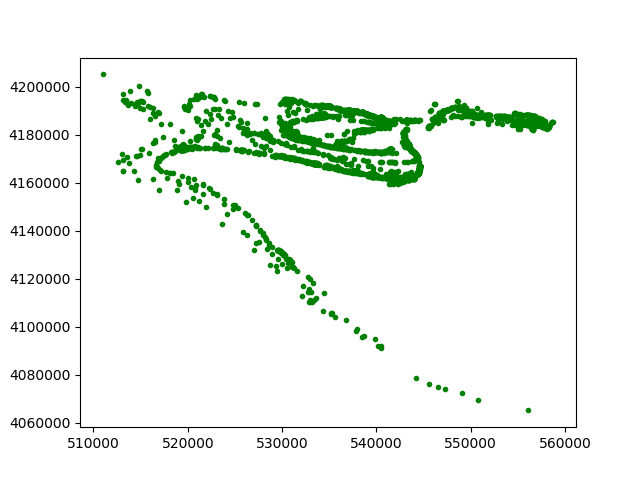

In [48]:
plt.figure()
plt.plot(data['x'][:,0],
         data['x'][:,1],'g.')

In [49]:
(~np.isfinite(data['x'][:,0])).sum() 

0